In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
x_train = np.loadtxt("C:\Infosys Springboard\Data Sets\Image Classification CNN Keras Dataset\input.csv", delimiter=',')
y_train = np.loadtxt("C:\Infosys Springboard\Data Sets\Image Classification CNN Keras Dataset\labels.csv", delimiter=',')

In [3]:
x_test = np.loadtxt("C:\Infosys Springboard\Data Sets\Image Classification CNN Keras Dataset\input_test.csv", delimiter=',')
y_test = np.loadtxt("C:\Infosys Springboard\Data Sets\Image Classification CNN Keras Dataset\labels_test.csv", delimiter=',')

In [4]:
x_train.ndim

2

In [5]:
print("Shape of x_train", x_train.shape) #2000
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)    
print("Shape of y_test", y_test.shape)

Shape of x_train (2000, 30000)
Shape of y_train (2000,)
Shape of x_test (400, 30000)
Shape of y_test (400,)


In [6]:
# resize image
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [7]:
x_train = x_train / 255.0
x_test = x_test/255.0

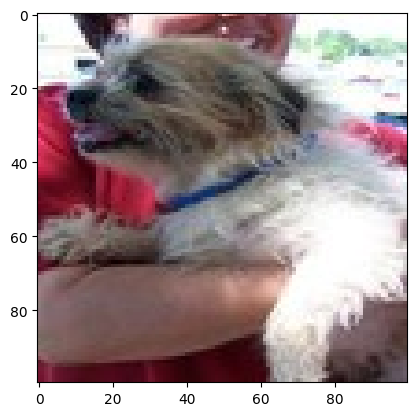

In [8]:
# displaying image
import matplotlib.pyplot as plt
import random

id = random.randint(0,len(x_train))
plt.imshow(x_train[id,:])
plt.show()

In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train, epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4918 - loss: 0.7224
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6387 - loss: 0.6411
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7025 - loss: 0.5687
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7739 - loss: 0.4853
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8096 - loss: 0.4195
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8337 - loss: 0.3796
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8458 - loss: 0.3332
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8899 - loss: 0.2607
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9215 - loss: 0.1978
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9429 - loss: 0.1587


In [12]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7026 - loss: 0.7860


[0.8415758013725281, 0.6850000023841858]

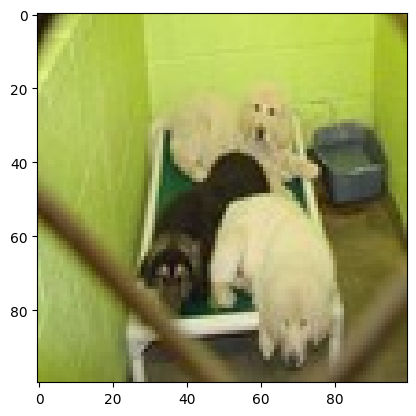

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.00011191]]
CAT


In [14]:
id1 = random.randint(0,len(y_test))
plt.imshow(x_test[id1,:])
plt.show()

y_pred = model.predict(x_test[id1,:].reshape(1,100,100,3))
print(y_pred)

if y_pred>0.5:
    print("DOG")
else:
    print("CAT")